### 가중치를 적용해 사인함수 예측(근사)하기

In [1]:
import math
import torch
import matplotlib.pyplot as plt

-pi부터 pi 사이에서 1,000개의 점 추출

In [2]:
x = torch.linspace(-math.pi, math.pi, 1000)

실제 사인곡선에 x를 대입하여 y(데이터) 만들기

In [3]:
y = torch.sin(x)

예측 사인곡선에 사용할 임의의 가중치(계수 a, b, c, d)와 예측값(y_rand) 만들기

In [4]:
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

In [5]:
y_rand = a*x**3 + b*x**2 + c*x + d

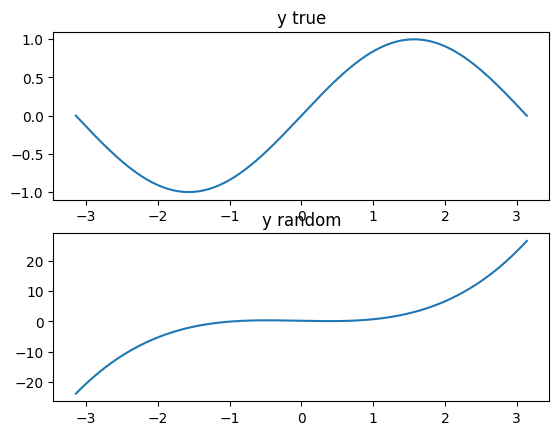

In [6]:
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title('y random')
plt.plot(x, y_rand)

plt.show()

학습 후 예측 데이터 얻기     

'학습' -> 손실(y - y_pred)을 이용해 가중치 a, b, c, d를 업데이트 함

In [11]:
learning_rate = 1e-6     # 일반적으로 1e-5 ~ 1e-6

for epoch in range(2000):
    y_pred = a*x**3 + b*x**2 + c*x + d
    loss = (y_pred - y).pow(2).sum().item()    # (y_pred - y) ** 2이 손실(L)
    
    if epoch % 100 == 0:
        print(f'epoch{epoch+1} loss: {loss}')
    
    grad_y_pred = 2.0 * (y_pred - y)     # dL/dy = 2(y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()    # dy/da = x ** 3    -> grad_a = dL/da = dL/dy * dy/da
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

epoch1 loss: 82533.125
epoch101 loss: 897.7898559570312
epoch201 loss: 731.064697265625
epoch301 loss: 595.547119140625
epoch401 loss: 485.3117980957031
epoch501 loss: 395.640869140625
epoch601 loss: 322.6968078613281
epoch701 loss: 263.35858154296875
epoch801 loss: 215.08755493164062
epoch901 loss: 175.81893920898438
epoch1001 loss: 143.873291015625
epoch1101 loss: 117.88435363769531
epoch1201 loss: 96.74114227294922
epoch1301 loss: 79.53984069824219
epoch1401 loss: 65.54517364501953
epoch1501 loss: 54.15923309326172
epoch1601 loss: 44.89546203613281
epoch1701 loss: 37.35812759399414
epoch1801 loss: 31.22538185119629
epoch1901 loss: 26.23537826538086


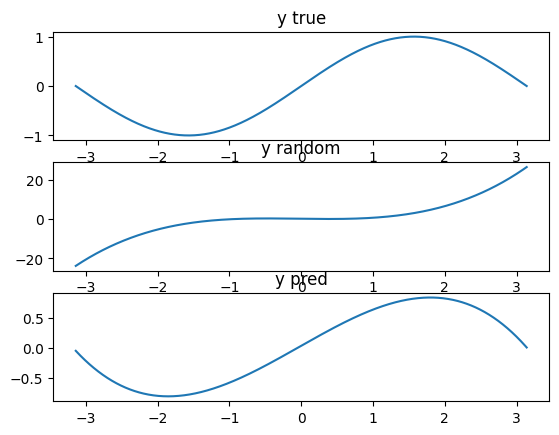

In [13]:
plt.subplot(3, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title('y random')
plt.plot(x, y_rand)

plt.subplot(3, 1, 3)
plt.title('y pred')
plt.plot(x, y_pred)